
size 100

size 1000

size 10000


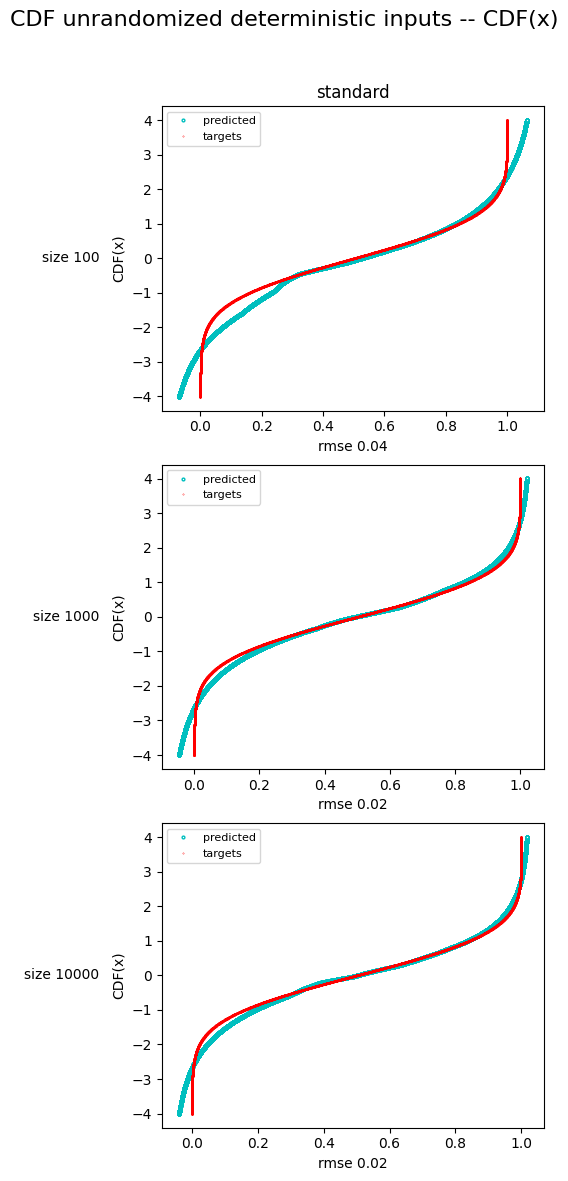

In [1]:
### Copy of Main.py as a juypter notebook to visualize results

#del sys.modules['DataImporter']

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..','..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

### - dataSeed = seed for simulations or (for csv input) for randomization of csv
weightSeed = 1 

###
### 1. Training data Generator/Importer
###

# 10^4 data data points
generator = DataImporter()
#print(generator.path == None)
generator.set_path('C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv')
generator.set_inputName('x')
generator.set_outputName('CDF(x)')
generator.set_trainTestRatio(0.8)
#generator.set_testDataPath('C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv')
generator.set_randomized(True)
generator.set_trainingSetSizes([100,1000,10000])
generator.set_dataSeed(1)

###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 20               # we use equal neurons for each hidden layer
hiddenLayers = 3                # amount of hidden layers
activationFunctionsHidden = [tf.nn.tanh]   # activation functions of hidden layers

epochs = 20
###
### 3. Train network
###
trainingMethod = TrainingMethod.Standard

xTest, yTest, yPredicted = train_and_test(generator, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod, epochs = epochs)
    
###
### 3. Study results
###   

# show predicitions
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, "x", "CDF(x)", yTest, generator, True, False, None, trainingMethod)